### Importación de datos



In [48]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [33]:
# Definimos las listas de DataFrames y nombres
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Calculamos el ingreso total por tienda sumando la columna "Precio"
ingresos = pd.DataFrame({
    "Tienda": nombres_tiendas,
    "Ingreso total": [df["Precio"].sum() for df in tiendas]
})

# Formateamos los ingresos para mostrar con formato monetario (opcional)
ingresos["Ingreso total"] = ingresos["Ingreso total"].apply(lambda x: f"${x:,.0f}")

# Mostramos el resultado
display(ingresos)

,Tienda,Ingreso total
0,Tienda 1,"$1,150,880,400"
1,Tienda 2,"$1,116,343,500"
2,Tienda 3,"$1,098,019,600"
3,Tienda 4,"$1,038,375,700"


/tmp/ipython-input-41-2742161180.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Tienda", y="Ingreso total", data=ingresos, palette="viridis")


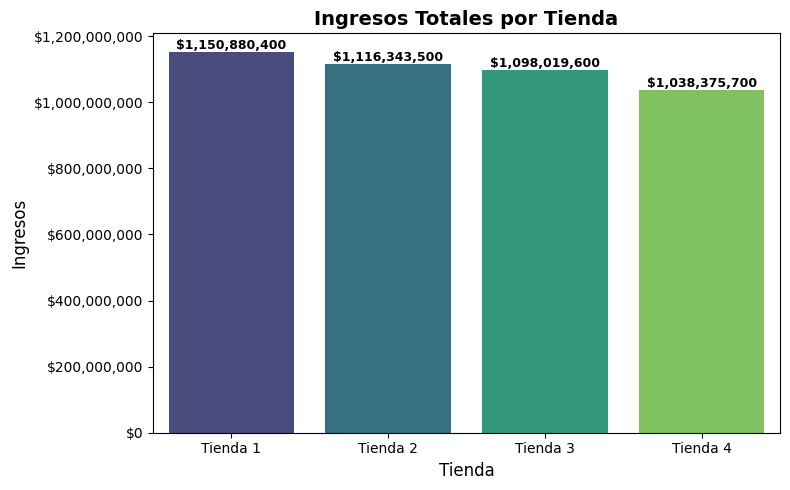

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 1. Definimos las listas de DataFrames y nombres
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# 2. Calculamos el ingreso total (como número, no como texto)
ingresos = pd.DataFrame({
    "Tienda": nombres_tiendas,
    "Ingreso total": [df["Precio"].sum() for df in tiendas]
})

# 3. Gráfico de barras verticales (barras que crecen de abajo hacia arriba)
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Tienda", y="Ingreso total", data=ingresos, palette="viridis")

plt.title("Ingresos Totales por Tienda", fontsize=14, fontweight='bold')
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Ingresos", fontsize=12)

# Mostrar los valores encima de las barras
for bar in ax.patches:
    valor = bar.get_height()
    ax.annotate(f"${valor:,.0f}",
                (bar.get_x() + bar.get_width() / 2, valor),
                ha='center', va='bottom', fontsize=9, fontweight='bold')

# Formatear el eje Y como moneda
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"${x:,.0f}"))

plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [34]:
def contar_por_categoria(df, nombre_tienda):
    conteo = df["Categoría del Producto"].value_counts().reset_index()
    conteo.columns = ["Categoría", "Cantidad Vendida"]
    conteo["Tienda"] = nombre_tienda
    return conteo

# Definimos listas
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Concatenamos los conteos de cada tienda en un solo DataFrame
categorias_vendidas = pd.concat(
    [contar_por_categoria(df, nombre) for df, nombre in zip(tiendas, nombres_tiendas)],
    ignore_index=True
)

# Ordenamos por tienda y luego cantidad descendente
categorias_vendidas = categorias_vendidas.sort_values(by=["Tienda", "Cantidad Vendida"], ascending=[True, False])

# Mostramos resultados por tienda, bien legible
for tienda_nombre in nombres_tiendas:
    print(f"\n--- Categorías más vendidas en {tienda_nombre} ---")
    df_tienda = categorias_vendidas[categorias_vendidas["Tienda"] == tienda_nombre]
    for _, row in df_tienda.iterrows():
        print(f"{row['Categoría']}: {row['Cantidad Vendida']} ventas")



--- Categorías más vendidas en Tienda 1 ---
Muebles: 465 ventas
Electrónicos: 448 ventas
Juguetes: 324 ventas
Electrodomésticos: 312 ventas
Deportes y diversión: 284 ventas
Instrumentos musicales: 182 ventas
Libros: 173 ventas
Artículos para el hogar: 171 ventas

--- Categorías más vendidas en Tienda 2 ---
Muebles: 442 ventas
Electrónicos: 422 ventas
Juguetes: 313 ventas
Electrodomésticos: 305 ventas
Deportes y diversión: 275 ventas
Instrumentos musicales: 224 ventas
Libros: 197 ventas
Artículos para el hogar: 181 ventas

--- Categorías más vendidas en Tienda 3 ---
Muebles: 499 ventas
Electrónicos: 451 ventas
Juguetes: 315 ventas
Electrodomésticos: 278 ventas
Deportes y diversión: 277 ventas
Libros: 185 ventas
Instrumentos musicales: 177 ventas
Artículos para el hogar: 177 ventas

--- Categorías más vendidas en Tienda 4 ---
Muebles: 480 ventas
Electrónicos: 451 ventas
Juguetes: 338 ventas
Deportes y diversión: 277 ventas
Electrodomésticos: 254 ventas
Artículos para el hogar: 201 venta

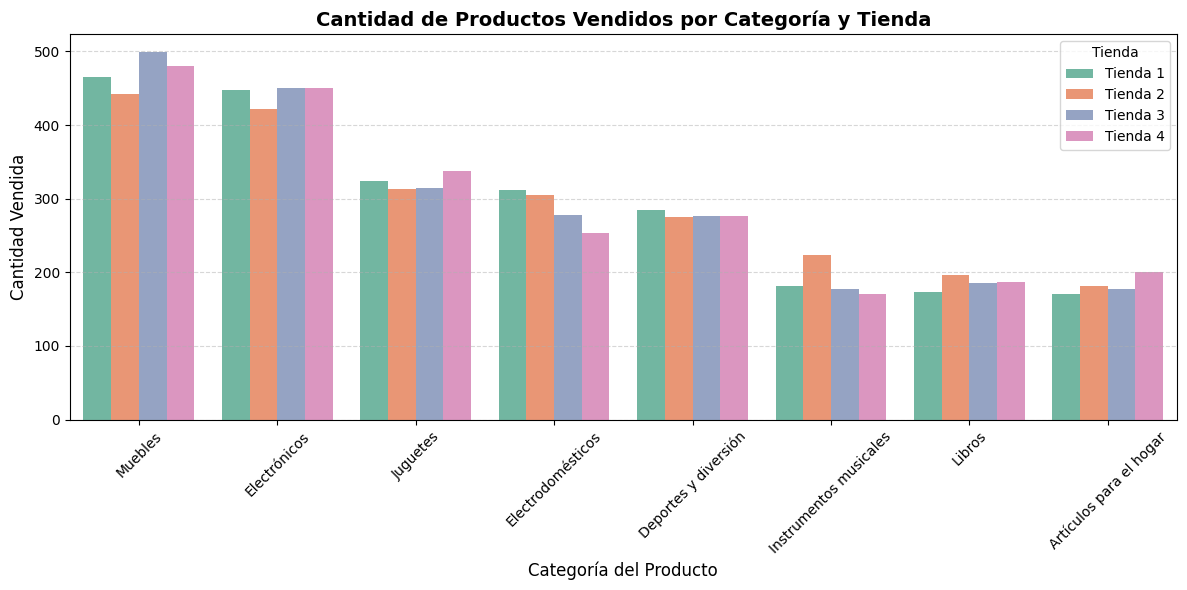

In [42]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Gráfico de barras agrupadas
sns.barplot(
    data=categorias_vendidas,
    x="Categoría",
    y="Cantidad Vendida",
    hue="Tienda",
    palette="Set2"
)

# Estética del gráfico
plt.title("Cantidad de Productos Vendidos por Categoría y Tienda", fontsize=14, fontweight='bold')
plt.xlabel("Categoría del Producto", fontsize=12)
plt.ylabel("Cantidad Vendida", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Tienda")
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


# 3. Calificación promedio de la tienda


In [35]:
# Definimos listas (si no las tenés definidas)
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Calculamos el promedio de la columna "Calificación" para cada tienda
promedios_calificaciones = [
    (nombre, df["Calificación"].mean())
    for df, nombre in zip(tiendas, nombres_tiendas)
]

# Lo convertimos a DataFrame para mejor visualización
promedios_df = pd.DataFrame(promedios_calificaciones, columns=["Tienda", "Calificación Promedio"])

# Redondeamos a 2 decimales
promedios_df["Calificación Promedio"] = promedios_df["Calificación Promedio"].round(2)

# Mostramos el resultado
display(promedios_df)



,Tienda,Calificación Promedio
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


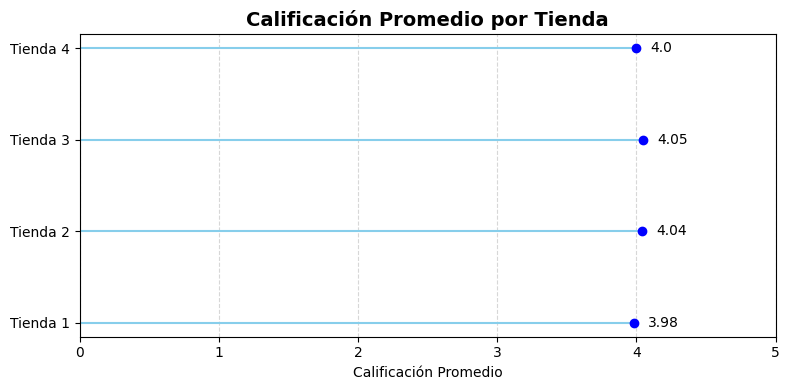

In [43]:
import matplotlib.pyplot as plt

# Datos
tiendas = promedios_df["Tienda"]
calificaciones = promedios_df["Calificación Promedio"]

# Crear figura
plt.figure(figsize=(8, 4))

# Gráfico de puntos
plt.hlines(y=tiendas, xmin=0, xmax=calificaciones, color='skyblue')
plt.plot(calificaciones, tiendas, "o", color='blue')

# Estética
plt.xlabel("Calificación Promedio")
plt.title("Calificación Promedio por Tienda", fontsize=14, fontweight='bold')
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Mostrar valores numéricos al lado de cada punto
for i, valor in enumerate(calificaciones):
    plt.text(valor + 0.1, tiendas[i], f"{valor}", va='center', fontsize=10)

plt.tight_layout()
plt.show()



# 4. Productos más y menos vendidos

In [53]:
def productos_mas_menos_vendidos(df, nombre_tienda):
    conteo = df["Producto"].value_counts().reset_index()
    conteo.columns = ["Producto", "Cantidad Vendida"]
    conteo["Tienda"] = nombre_tienda

    # Producto más vendido (máximo)
    mas_vendido = conteo.loc[conteo["Cantidad Vendida"].idxmax()]
    # Producto menos vendido (mínimo)
    menos_vendido = conteo.loc[conteo["Cantidad Vendida"].idxmin()]

    return mas_vendido, menos_vendido

tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

resultados = []

for df, nombre in zip(tiendas, nombres_tiendas):
    mas, menos = productos_mas_menos_vendidos(df, nombre)
    resultados.append({
        "Tienda": nombre,
        "Producto Más Vendido": mas["Producto"],
        "Ventas Más Vendidas": mas["Cantidad Vendida"],
        "Producto Menos Vendido": menos["Producto"],
        "Ventas Menos Vendidas": menos["Cantidad Vendida"]
    })

# Convertimos a DataFrame para mostrar
df_resultados = pd.DataFrame(resultados)

display(df_resultados)


,Tienda,Producto Más Vendido,Ventas Más Vendidas,Producto Menos Vendido,Ventas Menos Vendidas
0,Tienda 1,Microondas,60,Auriculares con micrófono,33
1,Tienda 2,Iniciando en programación,65,Juego de mesa,32
2,Tienda 3,Kit de bancas,57,Bloques de construcción,35
3,Tienda 4,Cama box,62,Guitarra eléctrica,33


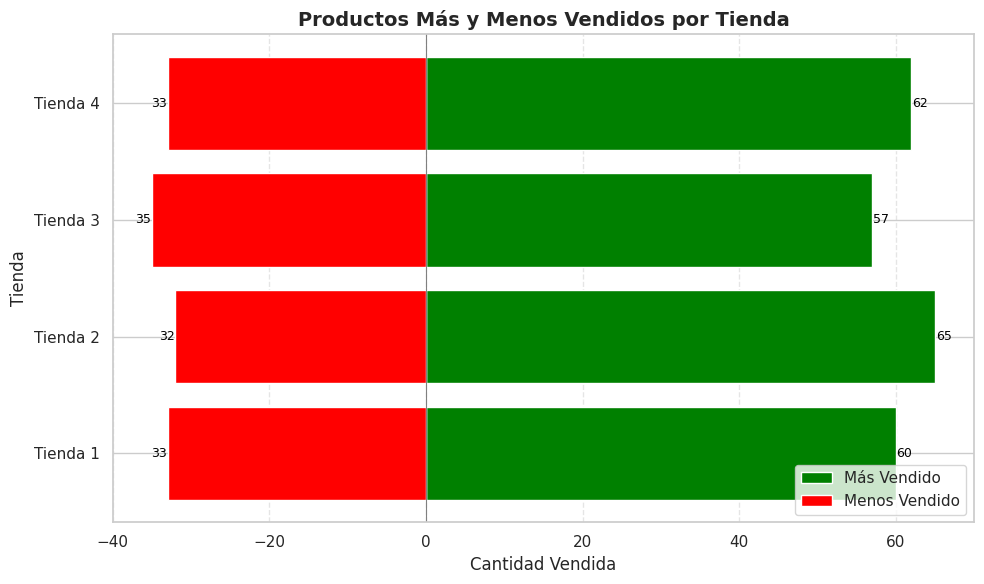

In [52]:
import matplotlib.pyplot as plt

# Preparar datos
tiendas = df_resultados["Tienda"]
mas_vendidos = df_resultados["Ventas Más Vendidas"]
menos_vendidos = df_resultados["Ventas Menos Vendidas"]

# Crear figura
plt.figure(figsize=(10, 6))

# Gráfico de barras horizontales en direcciones opuestas
plt.barh(tiendas, mas_vendidos, color='green', label='Más Vendido')
plt.barh(tiendas, [-v for v in menos_vendidos], color='red', label='Menos Vendido')

# Agregar etiquetas
for i in range(len(tiendas)):
    plt.text(mas_vendidos[i] + 0.1, i, f"{mas_vendidos[i]}", va='center', ha='left', fontsize=9, color='black')
    plt.text(-menos_vendidos[i] - 0.1, i, f"{menos_vendidos[i]}", va='center', ha='right', fontsize=9, color='black')

# Estética
plt.axvline(0, color='gray', linewidth=0.8)
plt.title("Productos Más y Menos Vendidos por Tienda", fontsize=14, fontweight='bold')
plt.xlabel("Cantidad Vendida")
plt.ylabel("Tienda")
plt.legend(loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Ajustes
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda



In [51]:
# Listas ya definidas
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Calculamos el costo de envío promedio para cada tienda
envio_promedio = [
    (nombre, df["Costo de envío"].mean())
    for df, nombre in zip(tiendas, nombres_tiendas)
]

# Convertimos a DataFrame para mejor presentación
df_envio = pd.DataFrame(envio_promedio, columns=["Tienda", "Costo de Envío Promedio"])

# Redondeamos a 2 decimales
df_envio["Costo de Envío Promedio"] = df_envio["Costo de Envío Promedio"].round(2)

display(df_envio)



,Tienda,Costo de Envío Promedio
0,Tienda 1,26018.61
1,Tienda 2,25216.24
2,Tienda 3,24805.68
3,Tienda 4,23459.46


/tmp/ipython-input-54-3032911607.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="Tienda", y="Costo de envío", data=df_envios, jitter=True, palette="Set2", size=6)


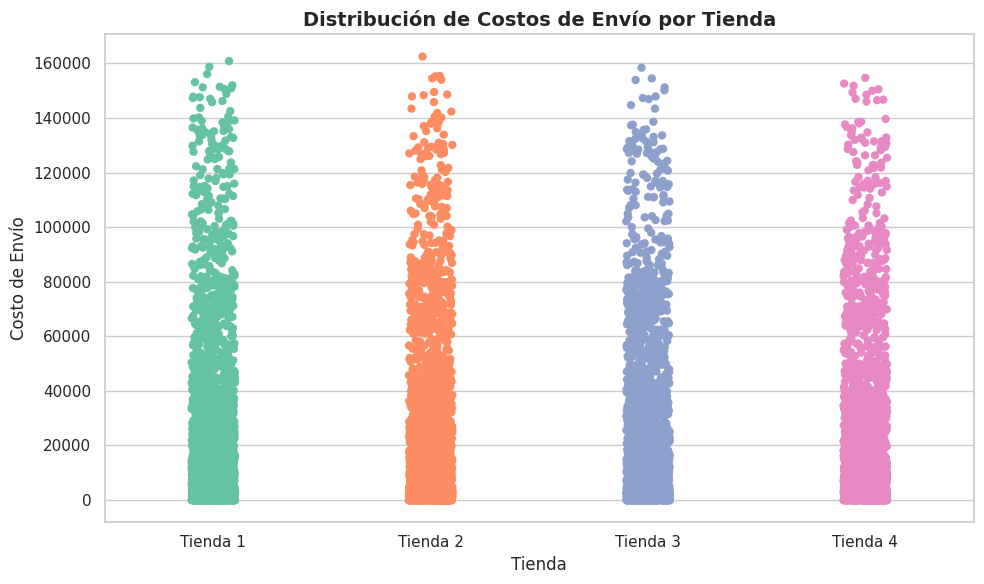

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenamos los datasets con una columna extra que indica la tienda
df_envios = pd.concat(
    [df.assign(Tienda=nombre) for df, nombre in zip(tiendas, nombres_tiendas)],
    ignore_index=True
)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Gráfico de puntos (stripplot)
sns.stripplot(x="Tienda", y="Costo de envío", data=df_envios, jitter=True, palette="Set2", size=6)

plt.title("Distribución de Costos de Envío por Tienda", fontsize=14, fontweight="bold")
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Costo de Envío", fontsize=12)
plt.tight_layout()
plt.show()


# Resumen


## 📌 Informe Final — Recomendación para el Sr. Juan

**Introducción**

El Sr. Juan busca iniciar un nuevo emprendimiento y para ello debe decidir cuál tienda de la cadena Alura Store debería vender, focalizándose en identificar la tienda menos eficiente para optimizar sus recursos y esfuerzos. Este informe sintetiza los análisis realizados sobre ingresos, ventas por categoría, satisfacción del cliente, productos más y menos vendidos, y costos de envío de las cuatro tiendas. A partir de estos datos y sus respectivas visualizaciones, se presentará una recomendación clara y fundamentada.

**Desarrollo**
1. **Ingresos totales**

Los ingresos reflejan la capacidad de generar ventas en volumen y valor. La Tienda 1 presenta el mayor ingreso total con aproximadamente 1,150 millones, seguida por Tienda 2 y Tienda 3, con ingresos algo menores, mientras que la Tienda 4 reporta el ingreso más bajo con cerca de $1,038 millones. Esto indica que la Tienda 4 tiene una menor capacidad de facturación, lo que puede ser una señal de menor eficiencia comercial.

2. **Ventas por categoría**

Todas las tiendas mantienen una estructura similar en las categorías más vendidas, siendo "Muebles", "Electrónicos" y "Juguetes" las predominantes. Sin embargo, la Tienda 4 muestra menores cantidades en categorías clave como "Electrodomésticos" y "Deportes y diversión" en comparación con las demás, lo que puede reflejar un rango menos competitivo o menor atractivo en su oferta.

3. **Calificación promedio de clientes**

La satisfacción del cliente es un indicador esencial para la fidelización y reputación. La Tienda 3 lidera con una calificación promedio de 4.05, seguida por Tienda 2 y Tienda 4 con calificaciones cercanas a 4.00. La Tienda 1, aunque con mayores ingresos, tiene la calificación más baja (3.98). No obstante, la Tienda 4 no destaca en este aspecto, ubicándose en un nivel intermedio, sin diferenciarse positivamente.

4. **Productos más y menos vendidos**

La variedad y rotación de productos reflejan la dinámica comercial. La Tienda 4 muestra un producto más vendido con 62 unidades y uno menos vendido con 33 unidades, cifras similares a las otras tiendas, pero sin un volumen sobresaliente. Esto apunta a una oferta y demanda relativamente modestas.

5. **Costo de envío promedio**

El costo de envío es relevante para la rentabilidad y competitividad. La Tienda 4 tiene el costo promedio de envío más bajo ($23,459), lo cual es positivo para márgenes y atracción de clientes, pero no compensa sus menores ingresos y ventas.

# Conclusión y recomendación

Tras evaluar todos los indicadores, la Tienda 4 se perfila como la menos eficiente dentro de la cadena Alura Store, considerando su menor ingreso total, ventas por categoría inferiores en segmentos clave y calificaciones promedio mediocres. Aunque su costo de envío es más bajo, esto no logra compensar su desempeño general.

Por lo tanto, se recomienda que el Sr. Juan venda la Tienda 4 para enfocar su nuevo emprendimiento en las tiendas con mejor rendimiento, tales como Tienda 1, Tienda 2 y Tienda 3, que presentan mejores ingresos, mayor satisfacción del cliente y un rango más amplio y competitivo de productos vendidos.

Esta decisión está fundamentada en un análisis integral que considera tanto aspectos comerciales (ingresos y ventas) como operativos (costos de envío y satisfacción), garantizando que el nuevo emprendimiento tenga mayores probabilidades de éxito y rentabilidad.